In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
# Load data
url = "https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/formula1_2019season_tracks.csv"
df = pd.read_csv(url)

In [6]:
print(df.columns)
print(df.head())

Index(['Country', 'City', 'Circuit Name', 'Date', 'First Grand Prix',
       'Number of Laps', 'Circuit Length', 'Race Distance', 'Lap Record',
       'Record Owner', 'Record Year', 'Turns', 'DRS Zones'],
      dtype='object')
      Country       City                    Circuit Name         Date  \
0   Australia  Melbourne             Albert Park Circuit  17 Mar 2019   
1     Bahrain     Sakhir   Bahrain International Circuit  31 Mar 2019   
2       China   Shanghai  Shanghai International Circuit  14 Apr 2019   
3  Azerbaijan       Baku               Baku City Circuit  28 Apr 2019   
4       Spain  Catalunya  Circuit de Barcelona-Catalunya  12 May 2019   

   First Grand Prix  Number of Laps  Circuit Length  Race Distance Lap Record  \
0              1996              58           5.303        307.574   1:24.125   
1              2004              57           5.412        308.238   1:31.447   
2              2004              56           5.451        305.066   1:32.238   
3         

In [35]:
features = ['Circuit Length', 'Turns', 'DRS Zones']
X = df[features].copy()
X = X.dropna()

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Elbow Method to find optimal k
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

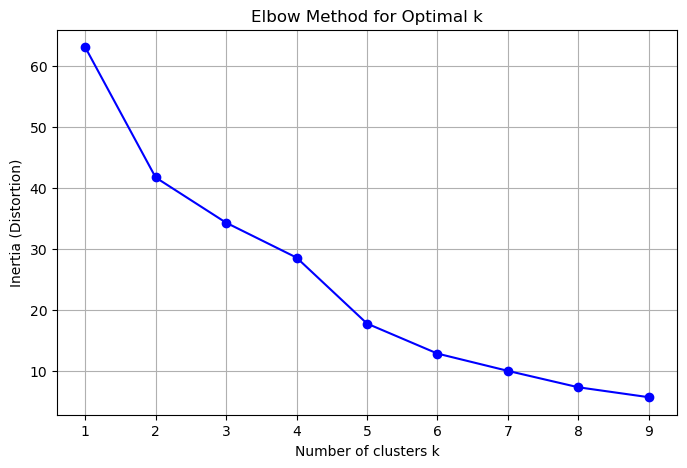

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [43]:
k_final = 4
kmeans = KMeans(n_clusters=k_final, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

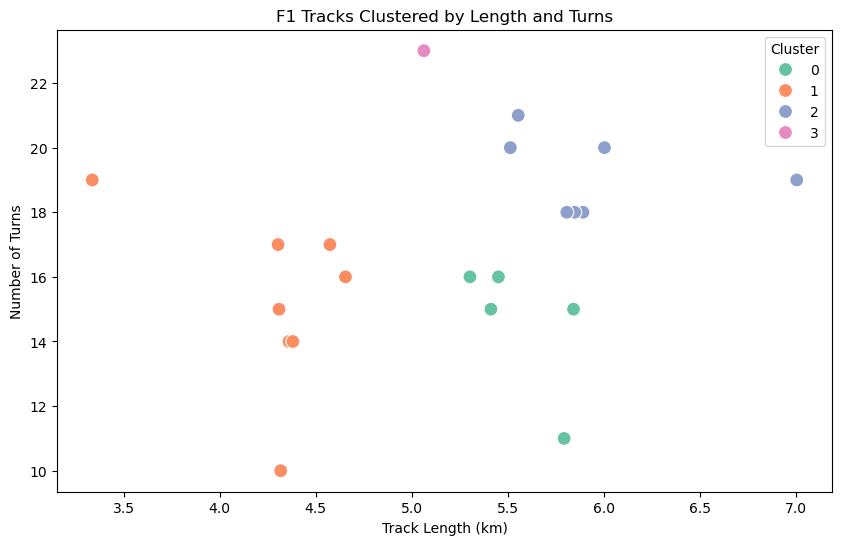

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Circuit Length', y='Turns',
    hue='cluster', palette='Set2', s=100
)
plt.title('F1 Tracks Clustered by Length and Turns')
plt.xlabel('Track Length (km)')
plt.ylabel('Number of Turns')
plt.legend(title='Cluster')
plt.show()

In [47]:
for c in range(k_final):
    print(f"\nCluster {c} examples:")
    print(df[df['cluster'] == c][['Circuit Name', 'City', 'Country', 'Circuit Length', 'Turns', 'DRS Zones']].head(3))


Cluster 0 examples:
                     Circuit Name       City    Country  Circuit Length  \
0             Albert Park Circuit  Melbourne  Australia           5.303   
1   Bahrain International Circuit     Sakhir    Bahrain           5.412   
2  Shanghai International Circuit   Shanghai      China           5.451   

   Turns  DRS Zones  
0     16          3  
1     15          3  
2     16          2  

Cluster 1 examples:
                     Circuit Name         City Country  Circuit Length  Turns  \
4  Circuit de Barcelona-Catalunya    Catalunya   Spain           4.655     16   
5               Circuit de Monaco  Monte Carlo  Monaco           3.337     19   
6       Circuit Gilles-Villeneuve     Montréal  Canada           4.361     14   

   DRS Zones  
4          2  
5          1  
6          3  

Cluster 2 examples:
                    Circuit Name               City        Country  \
3              Baku City Circuit               Baku     Azerbaijan   
9            Silverston